# 트립헬퍼(TripHelper) 프로젝트

## 1. 데이터 전처리를 하자

In [6]:
#!pip install --upgrade pip

  Using cached pip-24.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [9]:
#!pip install openpyxl

In [2]:
#데이터 전처리
import pandas as pd
df= pd.read_excel("/Users/ko-eunji/Desktop/TripHelper/DATA_2022년 국민여행조사_원자료.xlsx")
df.head()

,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,...,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
0,11010550211_277566,0,0,0,0,0,2,2,2,2,...,,,,,,,,,,
1,11010550211_277569,1,0,0,0,0,1,2,2,2,...,,,,,,,,,,
2,11010550211_277571,0,0,0,0,0,2,2,2,2,...,,,,,,,,,,
3,11010550211_277572,1,0,0,0,0,1,2,2,2,...,,,,,,,,,,
4,11010550211_277588,1,0,0,0,0,1,2,2,2,...,,,,,,,,,,


In [3]:
df.isna().sum() >= 1

ID                 False
SA1_1              False
SA1_2              False
SA1_3              False
SA1_4              False
                   ...  
국내_여행방문지_기타당일6     False
국내_여행방문지_기타당일7     False
국내_여행방문지_기타당일8     False
국내_여행방문지_기타당일9     False
국내_여행방문지_기타당일10    False
Length: 2343, dtype: bool

In [161]:
#여행 목적이 관광이 아닌 행 삭제
df = df[df.MON_EXP_3 != 1]
df = df[df.MON_EXP_5 != 1]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

In [5]:
df.shape

(52041, 2343)

In [42]:
#지역번호 숫자형태로 변경
df['D_TRA1_1_SPOT'] = pd.to_numeric(df['D_TRA1_1_SPOT'], errors='coerce')

In [43]:
#그래프 x축 라벨링
#label = ['여행지 지명도', '볼거리 제공', '저렴한 여행경비', '이동 거리', "여행할 수 있는 시간", "숙박시설", "쇼핑","음식","교통편","체험 프로그램 유무","경험자의 추천","관광지 편의시설","교육성(교육적 측면)","여행 동반자 유형" ,"기타", "sum"]
#index = np.arange(len(label))

In [44]:
#그래프 모듈 불러오기
#import matplotlib.pyplot as plt
import matplotlib

#matplotlib.rcParams['axes.unicode_minus'] = False

#폰트 불러오기
matplotlib.rcParams['font.family'] = "AppleGothic"

In [45]:
#1-10차 여행지까지 df_1에 저장
#df_1 =  df[['ID', 'D_TRA1_1_SPOT', 'D_TRA1_2_SPOT', 'D_TRA1_3_SPOT', 'D_TRA1_4_SPOT', 'D_TRA1_5_SPOT', 'D_TRA1_6_SPOT', 'D_TRA1_7_SPOT', 'D_TRA1_8_SPOT','D_TRA1_9_SPOT', 'D_TRA1_10_SPOT']]

In [46]:
#df_1.info()

In [47]:
#df_1.head(10)

In [48]:
#df_1.isna().sum()

In [68]:
#2차 여행지 지역명을 그룹으로 id의 빈도수 저장 -> 지역별로 빈도수 전부 더해서 하나로 합쳐야할 듯
df_sum2 = df.groupby('D_TRA1_1_SPOT')['ID'].count()
df_sum2

D_TRA1_1_SPOT
11010.0    184
11020.0     70
11030.0     32
11040.0     17
11050.0     32
          ... 
38380.0     62
38390.0     73
38400.0    111
39010.0    602
39020.0    535
Name: ID, Length: 229, dtype: int64

In [69]:
#df_sum4 = df_1.groupby('D_TRA1_4_SPOT')['ID'].count()
#df_sum4

In [70]:
#df_sum4.info()

In [71]:
#지역별 빈도수가 300이상인 지역 찾기
df_sum2.loc[df_sum2 >= 300]

D_TRA1_1_SPOT
21090.0    451
31370.0    371
31380.0    301
32010.0    326
32030.0    632
32060.0    426
34030.0    463
34380.0    333
35010.0    357
35380.0    304
36020.0    545
37010.0    416
37020.0    608
38090.0    302
38350.0    336
39010.0    602
39020.0    535
Name: ID, dtype: int64

### 1) 300이상인 지역 삭제
21090.0,31370.0,31380.0, 32010.0,32030.0,32060.0, 34030.0, 34380.0, 35010.0, 35380.0, 36020.0, 37010.0, 37020.0, 38090.0, 38350.0, 39010.0 ,39020.0

"부산광역시 해운대구","경기도 가평군", "경기도 양평군", "강원도 춘천시", "강원도 강릉시", "강원도 속초시", "충청남도 보령시", "충청남도 태안군","전라북도 전주시", "전라북도 부안군", "전라남도 여수시", "경상북도 포항시", "경상북도 경주시", "경상남도 거제시", "경상남도 남해군", "제주특별자치도 제주시", "제주특별자치도 제주시"


In [72]:
df_sum2.drop([21090.0,31370.0,31380.0, 32010.0,32030.0,32060.0, 34030.0, 34380.0, 35010.0, 35380.0, 36020.0, 37010.0, 37020.0, 38090.0, 38350.0, 39010.0 ,39020.0], inplace=True)

In [73]:
print(df_sum2)

D_TRA1_1_SPOT
11010.0    184
11020.0     70
11030.0     32
11040.0     17
11050.0     32
          ... 
38360.0    172
38370.0     88
38380.0     62
38390.0     73
38400.0    111
Name: ID, Length: 212, dtype: int64


In [74]:
df_sum2.loc[df_sum2 >= 300]

Series([], Name: ID, dtype: int64)

In [75]:
df_sum2

D_TRA1_1_SPOT
11010.0    184
11020.0     70
11030.0     32
11040.0     17
11050.0     32
          ... 
38360.0    172
38370.0     88
38380.0     62
38390.0     73
38400.0    111
Name: ID, Length: 212, dtype: int64

In [76]:
#그래프 라벨
#label = ["서울특별시 종로구", "서울특별시 중구", "서울특별시 용산구", "서울특별시 성동구", "서울특별시 광진구", "서울특별시 동대문구", "서울특별시 중랑구", "서울특별시 성북구", "서울특별시 강북구", "서울특별시 도봉구", "서울특별시 노원구", "서울특별시 은평구", "서울특별시 서대문구", "서울특별시 마포구", "서울특별시 양천구", "서울특별시 강서구", "서울특별시 구로구", "서울특별시 금천구", "서울특별시 영등포구", "서울특별시 동작구", "서울특별시 관악구", "서울특별시 서초구", "서울특별시 강남구", "서울특별시 송파구", "서울특별시 강동구", "부산광역시 중구", "부산광역시 서구", "부산광역시 동구", "부산광역시 영도구", "부산광역시 부산진구", "부산광역시 동래구", "부산광역시 남구", "부산광역시 북구", "부산광역시 해운대구", "부산광역시 사하구", "부산광역시 금정구", "부산광역시 강서구", "부산광역시 연제구", "부산광역시 수영구", "부산광역시 사상구", "부산광역시 기장군", "대구광역시 중구", "대구광역시 동구", "대구광역시 서구", "대구광역시 남구", "대구광역시 북구", "대구광역시 수성구", "대구광역시 달서구", "대구광역시 달성군", "인천광역시 중구", "인천광역시 동구", "인천광역시 미추홀구", "인천광역시 연수구", "인천광역시 남동구", "인천광역시 부평구", "인천광역시 계양구", "인천광역시 서구", "인천광역시 강화군", "인천광역시 옹진군", "광주광역시 동구", "광주광역시 서구", "광주광역시 남구", "광주광역시 북구", "광주광역시 광산구", "대전광역시 동구", "대전광역시 중구", "대전광역시 서구", "대전광역시 유성구", "대전광역시 대덕구", "울산광역시 중구", "울산광역시 남구", "울산광역시 동구", "울산광역시 북구", "울산광역시 울주군", "세종특별자치시 세종시", "경기도 수원시", "경기도 성남시", "경기도 의정부시", "경기도 안양시", "경기도 부천시", "경기도 광명시", "경기도 평택시", "경기도 동두천시", "경기도 안산시", "경기도 고양시", "경기도 과천시", "경기도 구리시", "경기도 남양주시", "경기도 오산시", "경기도 시흥시", "경기도 군포시", "경기도 의왕시", "경기도 하남시", "경기도 용인시", "경기도 파주시", "경기도 이천시", "경기도 안성시", "경기도 김포시", "경기도 화성시", "경기도 광주시", "경기도 양주시", "경기도 포천시", "경기도 여주시", "경기도 연천군", "경기도 가평군", "경기도 양평군", "강원도 춘천시", "강원도 원주시", "강원도 강릉시", "강원도 동해시", "강원도 태백시", "강원도 속초시", "강원도 삼척시", "강원도 홍천군", "강원도 횡성군", "강원도 영월군", "강원도 평창군", "강원도 정선군", "강원도 철원군", "강원도 화천군", "강원도 양구군", "강원도 인제군", "강원도 고성군", "강원도 양양군", "충청북도 충주시", "충청북도 제천시", "충청북도 청주시", "충청북도 보은군", "충청북도 옥천군", "충청북도 영동군", "충청북도 진천군", "충청북도 괴산군", "충청북도 음성군", "충청북도 단양군", "충청북도 증평군", "충청남도 천안시", "충청남도 공주시", "충청남도 보령시", "충청남도 아산시", "충청남도 서산시", "충청남도 논산시", "충청남도 계룡시", "충청남도 당진시", "충청남도 금산군", "충청남도 부여군", "충청남도 서천군", "충청남도 청양군", "충청남도 홍성군", "충청남도 예산군", "충청남도 태안군", "전라북도 전주시", "전라북도 군산시", "전라북도 익산시", "전라북도 정읍시", "전라북도 남원시", "전라북도 김제시", "전라북도 완주군", "전라북도 진안군", "전라북도 무주군", "전라북도 장수군", "전라북도 임실군", "전라북도 순창군", "전라북도 고창군", "전라북도 부안군", "전라남도 목포시", "전라남도 여수시", "전라남도 순천시", "전라남도 나주시", "전라남도 광양시", "전라남도 담양군", "전라남도 곡성군", "전라남도 구례군", "전라남도 고흥군", "전라남도 보성군", "전라남도 화순군", "전라남도 장흥군", "전라남도 강진군", "전라남도 해남군", "전라남도 영암군", "전라남도 무안군", "전라남도 함평군", "전라남도 영광군", "전라남도 장성군", "전라남도 완도군", "전라남도 진도군", "전라남도 신안군", "경상북도 포항시", "경상북도 경주시", "경상북도 김천시", "경상북도 안동시", "경상북도 구미시", "경상북도 영주시", "경상북도 영천시", "경상북도 상주시", "경상북도 문경시", "경상북도 경산시", "경상북도 군위군", "경상북도 의성군", "경상북도 청송군", "경상북도 영양군", "경상북도 영덕군", "경상북도 청도군", "경상북도 고령군", "경상북도 성주군", "경상북도 칠곡군", "경상북도 예천군", "경상북도 봉화군", "경상북도 울진군", "경상북도 울릉군", "경상남도 진주시", "경상남도 통영시", "경상남도 사천시", "경상남도 김해시", "경상남도 밀양시", "경상남도 거제시", "경상남도 양산시", "경상남도 창원시", "경상남도 의령군", "경상남도 함안군", "경상남도 창녕군", "경상남도 고성군", "경상남도 남해군", "경상남도 하동군", "경상남도 산청군", "경상남도 함양군", "경상남도 거창군", "경상남도 합천군", "제주특별자치도 제주시", "제주특별자치도 서귀포시"]
#index = np.arange(len(label))

In [77]:
#그래프 라벨 -> 삭제후 재라벨링
label = ["서울특별시 종로구", "서울특별시 중구", "서울특별시 용산구", "서울특별시 성동구", "서울특별시 광진구", "서울특별시 동대문구", "서울특별시 중랑구", "서울특별시 성북구", "서울특별시 강북구", "서울특별시 도봉구", "서울특별시 노원구", "서울특별시 은평구", "서울특별시 서대문구", "서울특별시 마포구", "서울특별시 양천구", "서울특별시 강서구", "서울특별시 구로구", "서울특별시 금천구", "서울특별시 영등포구", "서울특별시 동작구", "서울특별시 관악구", "서울특별시 서초구", "서울특별시 강남구", "서울특별시 송파구", "서울특별시 강동구", "부산광역시 중구", "부산광역시 서구", "부산광역시 동구", "부산광역시 영도구", "부산광역시 부산진구", "부산광역시 동래구", "부산광역시 남구", "부산광역시 북구", "부산광역시 사하구", "부산광역시 금정구", "부산광역시 강서구", "부산광역시 연제구", "부산광역시 수영구", "부산광역시 사상구", "부산광역시 기장군", "대구광역시 중구", "대구광역시 동구", "대구광역시 서구", "대구광역시 남구", "대구광역시 북구", "대구광역시 수성구", "대구광역시 달서구", "대구광역시 달성군", "인천광역시 중구", "인천광역시 동구", "인천광역시 미추홀구", "인천광역시 연수구", "인천광역시 남동구", "인천광역시 부평구", "인천광역시 계양구", "인천광역시 서구", "인천광역시 강화군", "인천광역시 옹진군", "광주광역시 동구", "광주광역시 서구", "광주광역시 남구", "광주광역시 북구", "광주광역시 광산구", "대전광역시 동구", "대전광역시 중구", "대전광역시 서구", "대전광역시 유성구", "대전광역시 대덕구", "울산광역시 중구", "울산광역시 남구", "울산광역시 동구", "울산광역시 북구", "울산광역시 울주군", "세종특별자치시 세종시", "경기도 수원시", "경기도 성남시", "경기도 의정부시", "경기도 안양시", "경기도 부천시", "경기도 광명시", "경기도 평택시", "경기도 동두천시", "경기도 안산시", "경기도 고양시", "경기도 과천시", "경기도 구리시", "경기도 남양주시", "경기도 오산시", "경기도 시흥시", "경기도 군포시", "경기도 의왕시", "경기도 하남시", "경기도 용인시", "경기도 파주시", "경기도 이천시", "경기도 안성시", "경기도 김포시", "경기도 화성시", "경기도 광주시", "경기도 양주시", "경기도 포천시", "경기도 여주시", "경기도 연천군", "강원도 원주시", "강원도 동해시", "강원도 태백시", "강원도 삼척시", "강원도 홍천군", "강원도 횡성군", "강원도 영월군", "강원도 평창군", "강원도 정선군", "강원도 철원군", "강원도 화천군", "강원도 양구군", "강원도 인제군", "강원도 고성군", "강원도 양양군", "충청북도 충주시", "충청북도 제천시", "충청북도 청주시", "충청북도 보은군", "충청북도 옥천군", "충청북도 영동군", "충청북도 진천군", "충청북도 괴산군", "충청북도 음성군", "충청북도 단양군", "충청북도 증평군", "충청남도 천안시", "충청남도 공주시", "충청남도 아산시", "충청남도 서산시", "충청남도 논산시", "충청남도 계룡시", "충청남도 당진시", "충청남도 금산군", "충청남도 부여군", "충청남도 서천군", "충청남도 청양군", "충청남도 홍성군", "충청남도 예산군", "전라북도 군산시", "전라북도 익산시", "전라북도 정읍시", "전라북도 남원시", "전라북도 김제시", "전라북도 완주군", "전라북도 진안군", "전라북도 무주군", "전라북도 장수군", "전라북도 임실군", "전라북도 순창군", "전라북도 고창군", "전라남도 목포시", "전라남도 순천시", "전라남도 나주시", "전라남도 광양시", "전라남도 담양군", "전라남도 곡성군", "전라남도 구례군", "전라남도 고흥군", "전라남도 보성군", "전라남도 화순군", "전라남도 장흥군", "전라남도 강진군", "전라남도 해남군", "전라남도 영암군", "전라남도 무안군", "전라남도 함평군", "전라남도 영광군", "전라남도 장성군", "전라남도 완도군", "전라남도 진도군", "전라남도 신안군", "경상북도 김천시", "경상북도 안동시", "경상북도 구미시", "경상북도 영주시", "경상북도 영천시", "경상북도 상주시", "경상북도 문경시", "경상북도 경산시", "경상북도 군위군", "경상북도 의성군", "경상북도 청송군", "경상북도 영양군", "경상북도 영덕군", "경상북도 청도군", "경상북도 고령군", "경상북도 성주군", "경상북도 칠곡군", "경상북도 예천군", "경상북도 봉화군", "경상북도 울진군", "경상북도 울릉군", "경상남도 진주시", "경상남도 통영시", "경상남도 사천시", "경상남도 김해시", "경상남도 밀양시", "경상남도 양산시", "경상남도 창원시", "경상남도 의령군", "경상남도 함안군", "경상남도 창녕군", "경상남도 고성군", "경상남도 하동군", "경상남도 산청군", "경상남도 함양군", "경상남도 거창군", "경상남도 합천군"]
index = np.arange(len(label))

In [78]:
len(label)

212

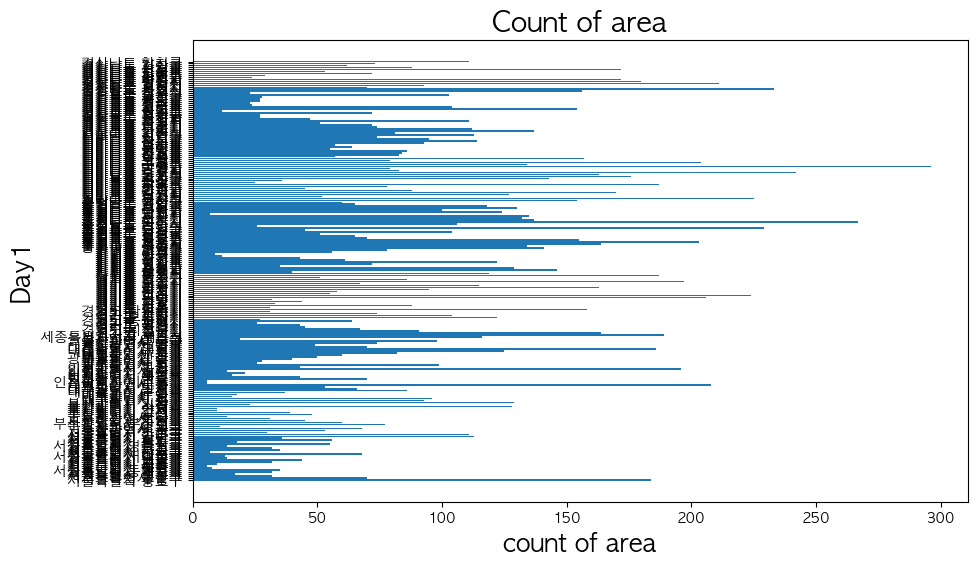

In [81]:
plt.barh(index, df_sum2)
plt.title('Count of area', fontsize=20)
plt.ylabel('Day1', fontsize=18)
plt.xlabel('count of area', fontsize=18)
plt.yticks(index, label, fontsize=10)
plt.show()

### 2) 하위 지역으로 찾기

In [36]:
#내림차순으로 정렬(여행지역 빈도수가 낮은거 볼려고)
df_sort = df_sum2.sort_values()

In [38]:
#낮은거 20개 확인
df_sort.head(20)

D_TRA1_1_SPOT
23030.0     6
23020.0     6
11080.0     6
34070.0     7
11150.0     7
11070.0     8
32380.0     9
21120.0    10
11090.0    10
21130.0    10
21030.0    11
37340.0    12
32370.0    12
11130.0    13
11120.0    14
11180.0    14
21080.0    14
23080.0    14
23060.0    16
22030.0    16
Name: ID, dtype: int64

In [61]:
#하위 20개 저장
df_sort = df_sort.nsmallest(20, keep='all')

#시리즈.nlargest(n, keep='first')
#n : 상위 몇개까지 나타낼 것인가
#keep='first' : 동등한 값이 있다면 제일 먼저 나온 값을 보여준다.

#시리즈의 경우엔 컬럼을 명시할 필요 없다.

#데이터프레임.nlargest(n, columns, keep='first')

#데이터프레임의 경우 우선 순위에 따라 컬럼을 명시해 줄 수 있다

In [62]:
label = ["인천광역시 미추홀구", "인천광역시 동구", "서울특별시 성북구", "충청남도 계룡시", "서울특별시 양천구", "서울특별시 중랑구", "강원도 양구군", "부산광역시 강서구", "서울특별시 강북구", "부산광역시 연제구", "부산광역시 동구", "경상북도 영양군", "경상북도 고령군", "서울특별시 서대문구", "서울특별시 은평구", "서울특별시 금천구", "부산광역시 북구", "인천광역시 서구", "인천광역시 부평구", "대구광역시 서구"]
index = np.arange(len(label))

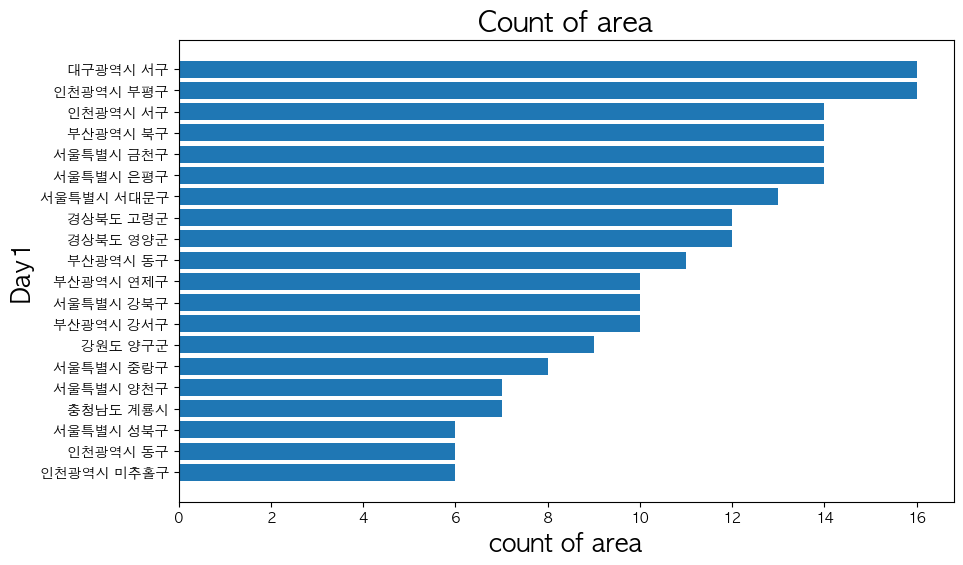

In [65]:
plt.barh(index, df_sort)
plt.title('Count of area', fontsize=20)
plt.ylabel('Day1', fontsize=18)
plt.xlabel('count of area', fontsize=18)
plt.yticks(index, label, fontsize=10)
plt.show()